In [2]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd
import numpy as np



In [3]:
def power_law(x, a, b):
    return a * np.power(x, b)


In [26]:
file = np.loadtxt("/Users/abubakribrahim/Desktop/observations/scripts/lum_evo.txt")
t = file[:,0]
t_err = file[:,1]

pf = file[:,2]
pf_err = file[:,3]
pf_err_30 = file[:,3]*2

In [27]:
time = np.linspace(0,600, 100)
popt, pcov = curve_fit(power_law, t, pf)


In [28]:
list(pf_err_30)

[19.994667105592605,
 18.201793287035038,
 19.911967643920708,
 18.30265855831852,
 20.888833001801636,
 20.912896008663974,
 19.289198303219244,
 15.878672005571584,
 21.752750464580735,
 19.957869469939354,
 17.799761281944548,
 22.537937898500125,
 20.912896008663974,
 16.773132506712393,
 17.250996135863932,
 12.277619726469037,
 9.851768041655989,
 10.779886242994882,
 13.452846223267063,
 14.03182558816898,
 11.313947988068582,
 12.987159607607643,
 14.213930182299416,
 11.521636725185697,
 11.625567923069513,
 22.543128047998415,
 8.964254499997022,
 6.349129392412503,
 9.183625766767305,
 13.861626028889793,
 7.621038891117053,
 6.485062678055516,
 6.324324973050755,
 5.680861194308284,
 5.763870011189822,
 5.385353026272258,
 5.514602049483527,
 4.603775929262466,
 4.54898157610765,
 4.716438522401603,
 4.568926565693928,
 2.150870078029919,
 1.7726140117454403,
 1.4528279216611288,
 1.2286103735652503,
 1.5188475252174993,
 1.0872118514388505,
 1.3403375290971955,
 0.99842208

<ipython-input-3-1e644c53c295>:2: RuntimeWarning: divide by zero encountered in power
  return a * np.power(x, b)


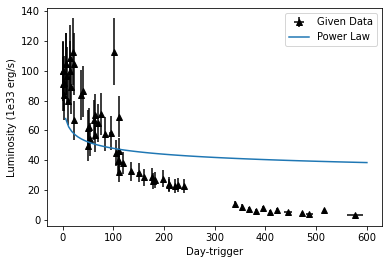

In [6]:
plt.errorbar(t, pf, xerr=t_err, yerr=pf_err, fmt='^k', label='Given Data')
plt.errorbar(time, power_law(time, *popt), label='Power Law')
plt.legend()
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('Day-trigger')
plt.ylabel('Luminosity (1e33 erg/s)')
plt.savefig('Luminosity_mdel_power-law-model.pdf', bbox_inches = 'tight')

plt.show()

import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd
import numpy as np

def power_law(x, a, b):
    return a * np.power(x, b)

df = pd.read_csv("/Users/abubakribrahim/Desktop/observations/scripts/PF_0.3-10kev.txt", delim_whitespace=True, header=None)

index_list = df[0].to_numpy(dtype=float)
freq_list = df[1].to_numpy(dtype=float)

plt.errorbar(index_list, freq_list, label='given data')

popt, pcov = curve_fit(power_law, index_list, freq_list, p0=[1, 1], bounds=[[1e-3, 1e-3], [1e20, 50]])

plt.errorbar(index_list, power_law(index_list, *popt), label='power law')
#plt.xscale('log')
#plt.yscale('log')
plt.legend()
plt.savefig('PF_mdel.pdf', bbox_inches = 'tight')
plt.show()

## Model the luminosity with the exponention function

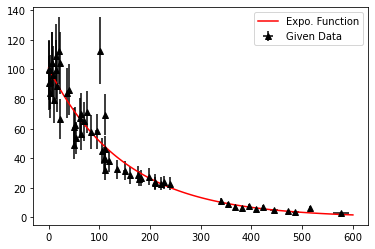

In [8]:
from scipy.optimize import curve_fit
import numpy as np
# define type of function to search
def model_func(x, a, k, b):
    return a * np.exp(-k*x) + b

# sample data
x = t
y = pf

# curve fit
p0 = (1.,1.e-5,1.) # starting search koefs
opt, pcov = curve_fit(model_func, x, y, p0)
a, k, b = opt
# test result
x2 = np.linspace(0, 600, 100)
y2 = model_func(x2, a, k, b)

plt.subplots()
plt.errorbar(x2, y2, color='r', label='Expo. Function')
plt.errorbar(x, y, xerr=t_err, yerr=pf_err, fmt='^k' , label='Given Data')
plt.legend(loc='best')
plt.savefig('Luminosity_mdel_exp.pdf', bbox_inches = 'tight')
plt.show()

In [9]:
print(a,k,b)

100.99392622460275 0.006696914948058553 -0.14346639538680886


## Model the radius with the exponention function

In [285]:
file = np.loadtxt("/Users/abubakribrahim/Desktop/observations/scripts/radius_evo.txt")
time = file[:,0]
time_err = file[:,1]

rad = file[:,2]
rad_err = file[:,3]

In [286]:
from scipy.optimize import curve_fit
import numpy as np
# define type of function to search
def model_func(time, aa, kk, bb):
    return aa * np.exp(-kk*time) + bb

# curve fit
p0 = (1.,1.e-3,1.) # starting search koefs
opt, pcov = curve_fit(model_func, time, rad, p0)
aa, kk, bb = opt


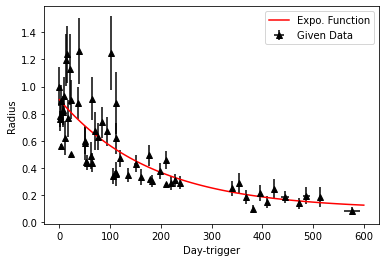

In [290]:
# test result
xx2 = np.linspace(0, 600, 100)
yy2 = model_func(xx2, aa, kk, bb)


plt.subplots()
plt.errorbar(xx2, yy2, color='r', label='Expo. Function')
plt.errorbar(time, rad, xerr=time_err, yerr=rad_err, fmt='^k',  label='Given Data')
ax.legend(loc='best')
plt.xlabel('Day-trigger')
plt.ylabel('Radius')
plt.legend(loc='best')
plt.savefig('Radius_mdel_exp.pdf', bbox_inches = 'tight')
plt.show()